# Machine Learning

### Forelæsning 1

Materialer:
Pattern Recognition and Machine Learning (PRML): Introduktion og kapitel 3
Neural Networks (NN): Introduktion og kapitel 1

Man har en model som beskriver sammenhæng mellem input og output. Så vil man gerne opsætte en maskine som bruger samme input og så sammenligner man outputtet med modellen og så justerer på maskinen således at outputtet bliver så meget ens som muligt. Man får maskinen til at lære de parametrer som bygger modellen.

Man opsætter problemet op med: Task, Experience og Performance:
Task: hvad man vil
Experience: Den data man sætter ind
Performance: Det endelige mål

Den data man bruger kaldes for training settet, når det sættes sammen med labelling, altså det rigtige svar fra dataen.
2 faser, træne fasen og teste fasen: man træner på kendt data og så tester det på mere data som er nyt for at se om det virker og så kan man så gå tilbage til trænefasen for at justere på parametre. 

Machine learning algoritmer
Der er flere typer algoritmer til at træne maskiner
Supervised learning, hvor man har noget data og så laver modeller ud fra det, lineær regression er en form for machine learning, fordi man laver en model ud fra data og så har parameter i a+x*b. Man har et dataset hvor man både kender inputtet og hvad maskinen skal give
Unsupervised learning, hvor man har data uden kendt output og så forsøger at kunne sige noget om dataen, for eksempel grupperingen af data eller densitets-bestemmelse
Reinforced learning, maskinen laver en fremgangsmåde og så får point således at maskinen kommer imod den rigtige model igennem rewards. Det er ikke ved at kigge på data, men at lave et system, for eksempel en bil der skal igennem en bane. 

Klassificering vs regression
Model hvor man opdeler om input er i en bestemt klasse ud fra data om input vs man bygger en model ud fra dataen. Et beslutningsområde

Reinforced learning, man får input fra området og laver en action og så får en en reward efter den action og dermed så kan man ændre sine actioner udfra at maksimere reward.

Direkte mapping: input -> ML -> output
Inverse mapping: output -> ML -> input
Hvad skal der til for at få et bestemt output

Støjen vil altid være gaussisk fordelt og lave en normalfordeling med midtpunkt i 0. Altså støj ~ N(0, sigma^2)

^y så betyder det at det kommer fra modellen og derfor ikke er den rigtige data. 


#### Den generelle lineære model er
^y(x,W) = ω_0 + ∑^m_(j=1) ω_j*o_j(x) 
Vælg modellen og så skal modellen lave nogle vægte W

Man får input og så ud fra de forskellige modeller o_j(x)_1, o_j(x)_2 og o_j(x)_3 har den nogle vægte w_1, w_2 og w_3

Den iterative model

Så bruger man optimering til at opdatere vægte. Man kan fx starte med 0 på alle vægtene og så får man et output og sammenligner med det rigtige output og ser på fejlene. Hvis der så er en stor fejl mellem rigtig og modelleret output ændrer man på vægtene sådan at fejlen bliver mindre. 

for i =1:k_iter
    for j = 1:L_train
        grad = de(k)dw;
        W = W +eta*grad
    e(i) = mean(e^2)

Mean square error skal komme imod 0, lave en eksponentiel faldene kurve mod ingen fejl.
eta beskriver hvor hurtigt faldene grafen er, den skal være optimeret så man falder hurtigt man rammer i 0 og ikke hopper forbi den.

Man kan også bruge en feature matrix hvor man beregner output ud fra vægtene i et hug og så behøver man ikke køre forløkkerne iterativt igen og igen. Kaldes Moor-Penrose pseudo inverse.

Underfitting og overfitting. Man risikrer ikke at have den helt rigtige datamængde for at finde den rigtige model. fx kan en sinuskurve blive en lige linje hvis man har for mange kurver i daten. Overfitting er at den lærer støjen og underfitting er for simpel model.

Man laver krydsvalidering ved at teste på hele datasettet og træner på resten. Og så skifter mellem det man tester og det man træner på.

#### Den ikke-linære model (neural netværk)
Man får input og så ud fra de forskellige modeller, hvor man også ændrer inputtet o_j(v*x)_1 + v0, o_j(v*x)_2+v0 og o_j(v*x)_3+v0 har den nogle vægte w_1, w_2 og w_3
Man vælger v ud fra gaussisk fordeling og så har man nærmest 2 frie værdier. vægte og v, og så laver modellen ud fra dem begge.

Der er så forskellige funktioner der bruges således at fejlen bliver så lav som muligt
Threshold, sign og sigmoid og tangents

Rossenblatt er det simpleste neurale netværk, den tager et input og ganger det med vægten og så kigger på output og giver det -1 og 1 alt efter om fejlen er negativ eller positiv.





### Opgave 1 del 1

In [1]:
# from matlab
import numpy as np
import matplotlib.pyplot as plt

L_train = 100
noise = 0.3
t_m = np.arange(0,100,1)
Y_true = np.sin(2*np.pi*t_m)
#X_train = 0+(0/1).*np.random(L_train,1)

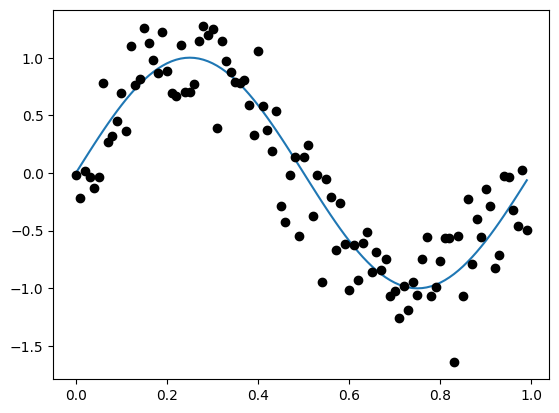

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


L=100
k=np.arange(1,L,1)
t = np.arange(0,1,0.01)
y = np.sin(2*np.pi*t)

plt.plot(t, y)

nk = np.random.normal(0,np.sqrt(0.09),t.size)
tk = t
yk = np.sin(2*np.pi*tk)+nk


plt.plot(tk, yk, 'o', color='black')
plt.show()





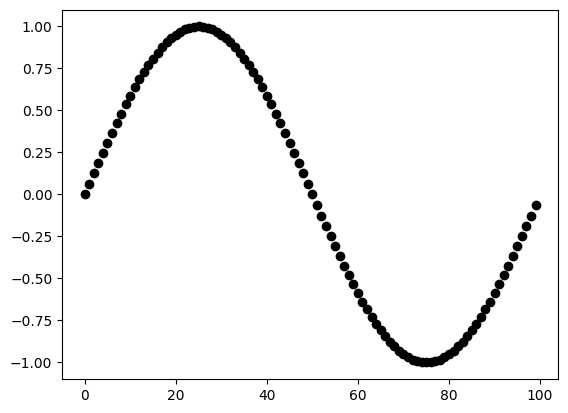

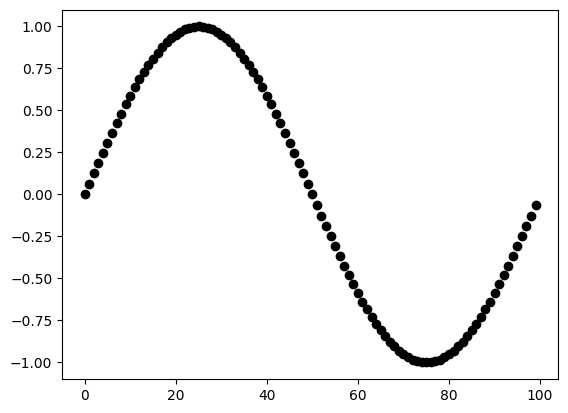

In [3]:


nk = np.random.normal(0,np.sqrt(0.0),t.size)
nk1 = np.random.normal(0,np.sqrt(0.02),t.size)
tk = t
yk = np.sin(2*np.pi*tk)+nk
yk1 = np.sin(2*np.pi*tk)+nk

plt.plot(yk, 'o', color='black')
plt.show()
plt.plot(yk1, 'o', color='black')
plt.show()

### Opgave 1 del 2

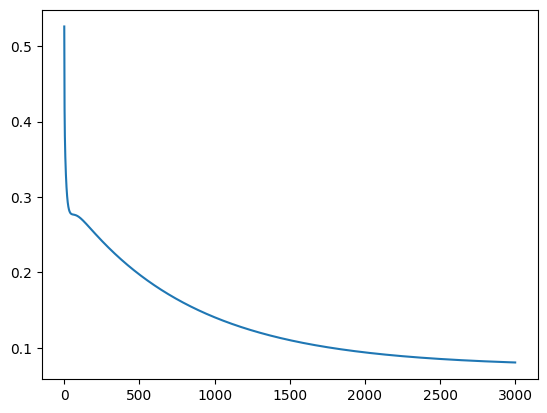

In [4]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

# Information som gives
L=100
tk = np.arange(0,1,0.01)
M = 3
W = np.zeros(M+1)
eta = 0.1
iterations = 3000

# def lige yk igen

nk = np.random.normal(0,np.sqrt(0.09),tk.size)
yk = np.sin(2*np.pi*tk)+nk

# laver en vector med MSE
MSE = np.zeros(iterations)
# laver en matrix størrelsen for funktionerne
phi = np.zeros((L, M+1))
# fylder den ud med selve funktionerne
# funktionerne skal opfylde ligning (2)
for i in range(L):
    for j in range(M+1):
        phi[i,j] = tk[i]**j

# her laves selve gradient descent
for i in range(iterations):
    for j in range(L):
        e = (yk[j]-W.T @ phi[j])
        W = W + eta *e*phi[j]
    MSE[i] = np.mean((yk- phi @ W.T)**2)

plt.plot(MSE)

print()

### Opgave 2 del 2

Text(0, 0.5, 'MSE')

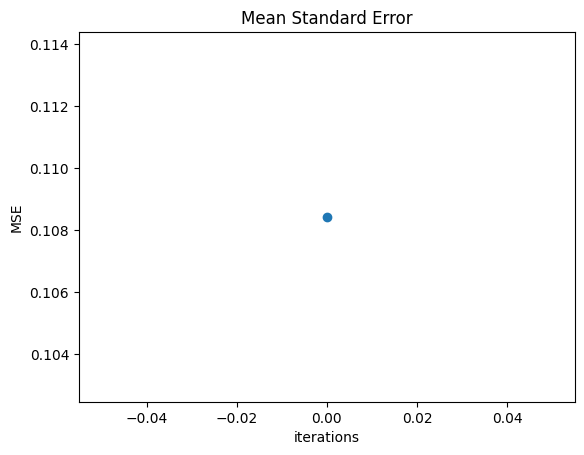

In [5]:
iter = np.arange(0,e.size)
plt.scatter(iter,e)
plt.title("Mean Standard Error")
plt.xlabel("iterations")
plt.ylabel("MSE")
# Plotter MSE ud fra iterations

### Opgave 3 del 2

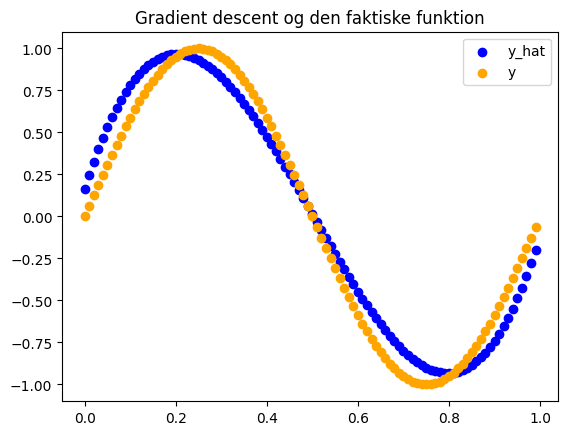

In [6]:
# Plotter den rigtige y-funktion og den beregnede "y_hat" ud fra gradient descent
y_hat = np.array([W @ phi.T])
y = np.sin(2*np.pi*tk)

plt.scatter(tk,y_hat,color="blue")
plt.scatter(tk,y,color="orange")
plt.title("Gradient descent og den faktiske funktion")
plt.legend(["y_hat","y"])

### Opgave 4 del 2

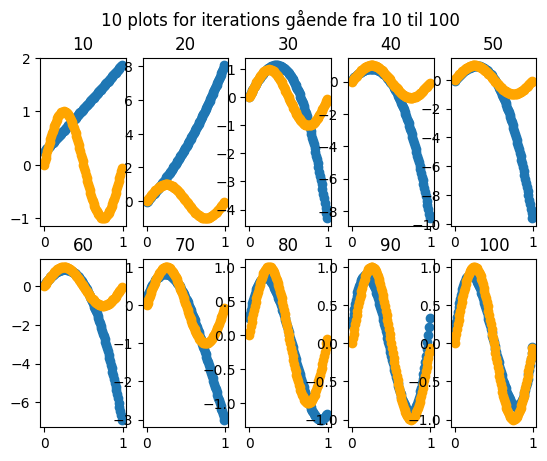

In [7]:
# Laver en funktion af gradient descent hvor L, eta og iterations kan ændres
def grad_dec(L,eta,iterations):
    tk = np.arange(0,1,0.01)
    M = 3
    W = np.zeros(M+1)
    nk = np.random.normal(0,np.sqrt(0.09),tk.size)
    yk = np.sin(2*np.pi*tk)+nk
    e = np.zeros(iterations)
    phi = np.zeros((L, M+1))

    for i in range(L):
        for j in range(M+1):
            phi[i,j] = tk[i]**j
    for i in range(iterations):
        for j in range(L):
            grad = (yk[j]-W.T @ phi[j]) * phi[j]
            W = W + eta * grad
    return W
# Her ændres L fra 10 til 100
for i in range(1,11):
    W = [grad_dec(i*10,0.1,3000)]
    y_hat = np.array([W @ phi.T])
    plt.subplot(2, 5, int(i))
    plt.scatter(tk,y_hat[0][0])
    plt.scatter(tk,y,color="orange")
    plt.title(str(i*10))

plt.suptitle("10 plots for iterations gående fra 10 til 100")
plt.show()

# viser tydeligt at 100 L er den bedste


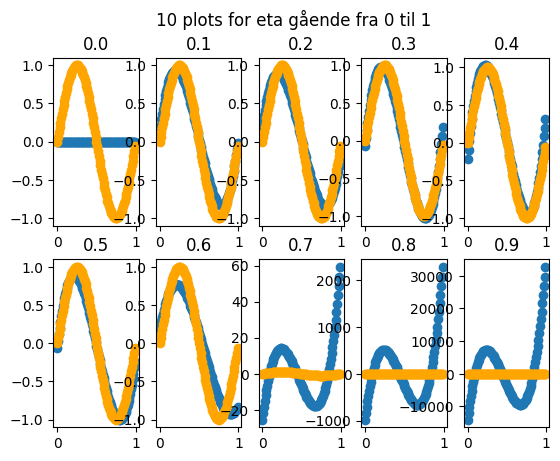

<Figure size 2500x480 with 0 Axes>

In [8]:
# Her ændres eta fra 10 til 100
a = 1
for i in range(0,10,1):
    W = [grad_dec(100,i/10,3000)]
    y_hat = np.array([W @ phi.T])
    plt.subplot(2, 5, a)
    plt.scatter(tk,y_hat[0][0])
    plt.scatter(tk,y,color="orange")
    plt.title(str(i/10))
    a=a+1

plt.suptitle("10 plots for eta gående fra 0 til 1")
plt.figure().set_figwidth(25)
plt.show()

# Viser at eta skal være på 0.1

### Opgave 1 del 3
Gradient descent based iterative algorithm

In [9]:
import numpy as np
import matplotlib.pyplot as plt

L=100
tk = np.arange(0,1,0.01)
nk = np.random.normal(0,np.sqrt(0.09),tk.size)
M = 3
W = np.zeros(M+1)
eta = 0.1
iterations = 3000
k=np.arange(1,L,1)
y = np.sin(2*np.pi*tk)
sigma = 0.09

y = np.sin(2*np.pi*tk)

yk = np.sin(2*np.pi*tk)+nk
phi = np.zeros((L, M+1))

for i in range(L):
    for j in range(M+1):
        phi[i,j] = tk[i]**j



def mppi(L, yk, phi):
    W = np.linalg.inv(np.transpose(phi)@phi)@np.transpose(phi)@yk
    e = np.mean((yk- phi @ W.T)**2)
    return W




### Opgave 2 del 3

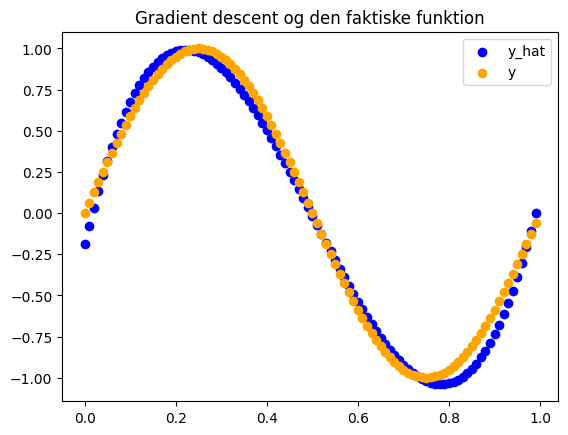

In [10]:
# Plotter den rigtige y-funktion og den beregnede "y_hat" ud fra MPPI
W = mppi(L,yk,phi)
y_hat = np.array([W @ phi.T])
y = np.sin(2*np.pi*tk)

plt.scatter(tk,y_hat,color="blue")
plt.scatter(tk,y,color="orange")
plt.title("Gradient descent og den faktiske funktion")
plt.legend(["y_hat","y"])

### Opgave 3 del 3

Cross validation

[ 0.4518253  -0.07780832  0.33604465  0.07479333 -0.27848994 -0.10983733
 -0.09911741  0.16335758  0.0224262   0.09998743 -0.24188708 -0.25414646
 -0.14283475  0.37471945  0.1268011  -0.23236617 -0.32671013 -0.33360711
 -0.00687384  0.40250092 -0.03062746  0.43702562  0.08798137  0.16293805
 -0.38631311 -0.12144755  0.13234077 -0.16527387  0.84856336  0.07203673
  0.03462172 -0.08371608  0.12502063  0.60496135  0.46359841  0.36492513
  0.1649749   0.17784527  0.02487392  0.15167491  0.06956569  0.09887243
  0.10862761 -0.49141105  0.41918547  0.02424906  0.4138331   0.51386646
  0.01482295  0.36991933  0.31480343  0.55982236 -0.06094833  0.38822366
  0.63917496  0.69193294  0.15227702  0.64805008  0.28614669  0.20489545
  0.65494887  0.07064515  0.82464293  0.61044209  0.49991104  0.29872445
  0.93838405  0.40884092  0.48568453  0.67508285  0.25293118  0.60217811
  0.4065405   0.5497132   0.48762591  0.48339366  0.67887856 -0.08149169
  1.07280414  0.26746621  1.22271115  0.67879861  0

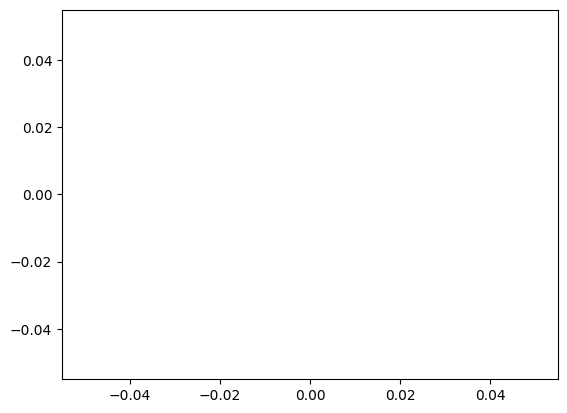

In [11]:
# for i in range(iterations):
#     for j in range(L):
#         e = (yk[j]-W.T @ phi[j])
#         W = W + eta *e*phi[j]
#     MSE[i] = np.mean((yk- phi @ W.T)**2)
# # MPPI



L = 1000
tk = np.arange(0,1,0.001)
nk = np.random.normal(0,np.sqrt(0.09),tk.size)

# Definerer yk and some arrays
yk = np.sin(2*np.pi*tk)+nk
test_data = []
training_data_final = []

# Splitter yk op i 10 dele
splits = np.split(yk,10)
test_data = []
training_data = []

for i in range(0,10):
    test_data.append(splits[i])
    training_data_part = []

print(test_data[0])
# vi tager og tilføjer 100 af hele yk til test-data og så tilføjer de resterende 900 til en training data final. 
# dette gøres 10 gange, så man får en matrix på 10x900 med training og 10x100 med test
for i, indice in enumerate(splits):
    training_data = np.array([])
    test_data.append(indice)
    for j, data in enumerate(splits):
        if j == i:
            continue
        training_data = np.concatenate((training_data, data))
    training_data_final.append(training_data)
     
# laver phi som er en matrix på 10x900
phi = np.zeros((10, training_data.size))
for i in range(10):
    for j in range(training_data.size):
        phi[i,j] = tk[i]**j


phi = np.array(phi)
#print(phi)
training_data_final = np.array(training_data_final)
#print(training_data_final)


# mppi ud fra de to 10x900 matricer af phi og yk
def mppi(L, yk, phi):
    W = np.linalg.inv(np.transpose(phi)@phi)@np.transpose(phi)@yk
    e = np.mean((yk- phi[i] @ W[i].T)**2)
    return W,e

W,e = mppi(L,training_data_final,phi)

# MPPI
# def mppi(L, yk, phi):
#     W = []
#     for i in range(100,1000,100):
#         W.append( np.linalg.inv(np.transpose(phi)@phi)@np.transpose(phi)@yk)
#         e[i] = np.mean(0.5*(yk- phi @ W[i].T)**2)
    
#     return W, e
#W = mppi(L,training_data_final,phi)
# print(W)
# print(e)

plt.plot(e)

In [100]:
L = 1000
crosses = 10
tk = np.arange(0,1,0.001)
nk = np.random.normal(0,np.sqrt(0.09),tk.size)

# Definerer yk and some arrays
yk = np.sin(2*np.pi*tk)+nk

# Splitter yk op i 10 dele
splits = np.split(yk,crosses)
test_data = []
training_data = []


for i in range(crosses):
    # tilføj test-delen til test array 10 gange for hver af de 10 dele
    training_data_part = np.array([])
    test_data.append(splits[i])
    # går igennem alle splits
    for j in range(crosses):

        # Hvis test-delen er den første del fra 0 til 100, tilføjes denne ikke til training arrayet
        # hvis test-delen ikke er den første del er dette starten på training arrayet
        if j!=i:
            training_data_part = np.concatenate((training_data_part,splits[j]))
    training_data.append(training_data_part)



training_data = np.array(training_data)

phi = np.zeros(((crosses-1)*100, M+1))
# fylder den ud med selve funktionerne
# funktionerne skal opfylde ligning (2)
for i in range((crosses-1)*100):
    for j in range(M+1):
        phi[i,j] = tk[i]**j

print(phi.shape)
print(training_data.shape)

def mppi(L, yk, phi):
    W = []
    e = []
    for i in range(crosses):
        W.append(np.linalg.inv(np.transpose(phi)@phi)@np.transpose(phi)@yk[i])
        e.append(np.mean((yk- phi[i] @ W[i].T)**2))
    return W,e



W,e = mppi(L,training_data,phi)
W = np.array(W)
print(W.shape)


(900, 4)
(10, 900)
(10, 4)
